# LangChain 核心模块学习：Chains

对于简单的大模型应用，单独使用语言模型（LLMs）是可以的。

但更复杂的大模型应用需要将 LLMs 和 Chat Models 链接在一起 - 要么彼此链接，要么与其他组件链接。

LangChain 为这种“链式”应用程序提供了 Chain 接口。

LangChain 以通用方式定义了 Chain，它是对组件进行调用序列的集合，其中可以包含其他链。

## 1.LLMChain

LLMChain 是 LangChain 中最简单的链，作为其他复杂 Chains 和 Agents 的内部调用，被广泛应用。

一个LLMChain由PromptTemplate和语言模型（LLM or Chat Model）组成。它使用直接传入（或 memory 提供）的 key-value 来规范化生成 Prompt Template（提示模板），并将生成的 prompt （格式化后的字符串）传递给大模型，并返回大模型输出。

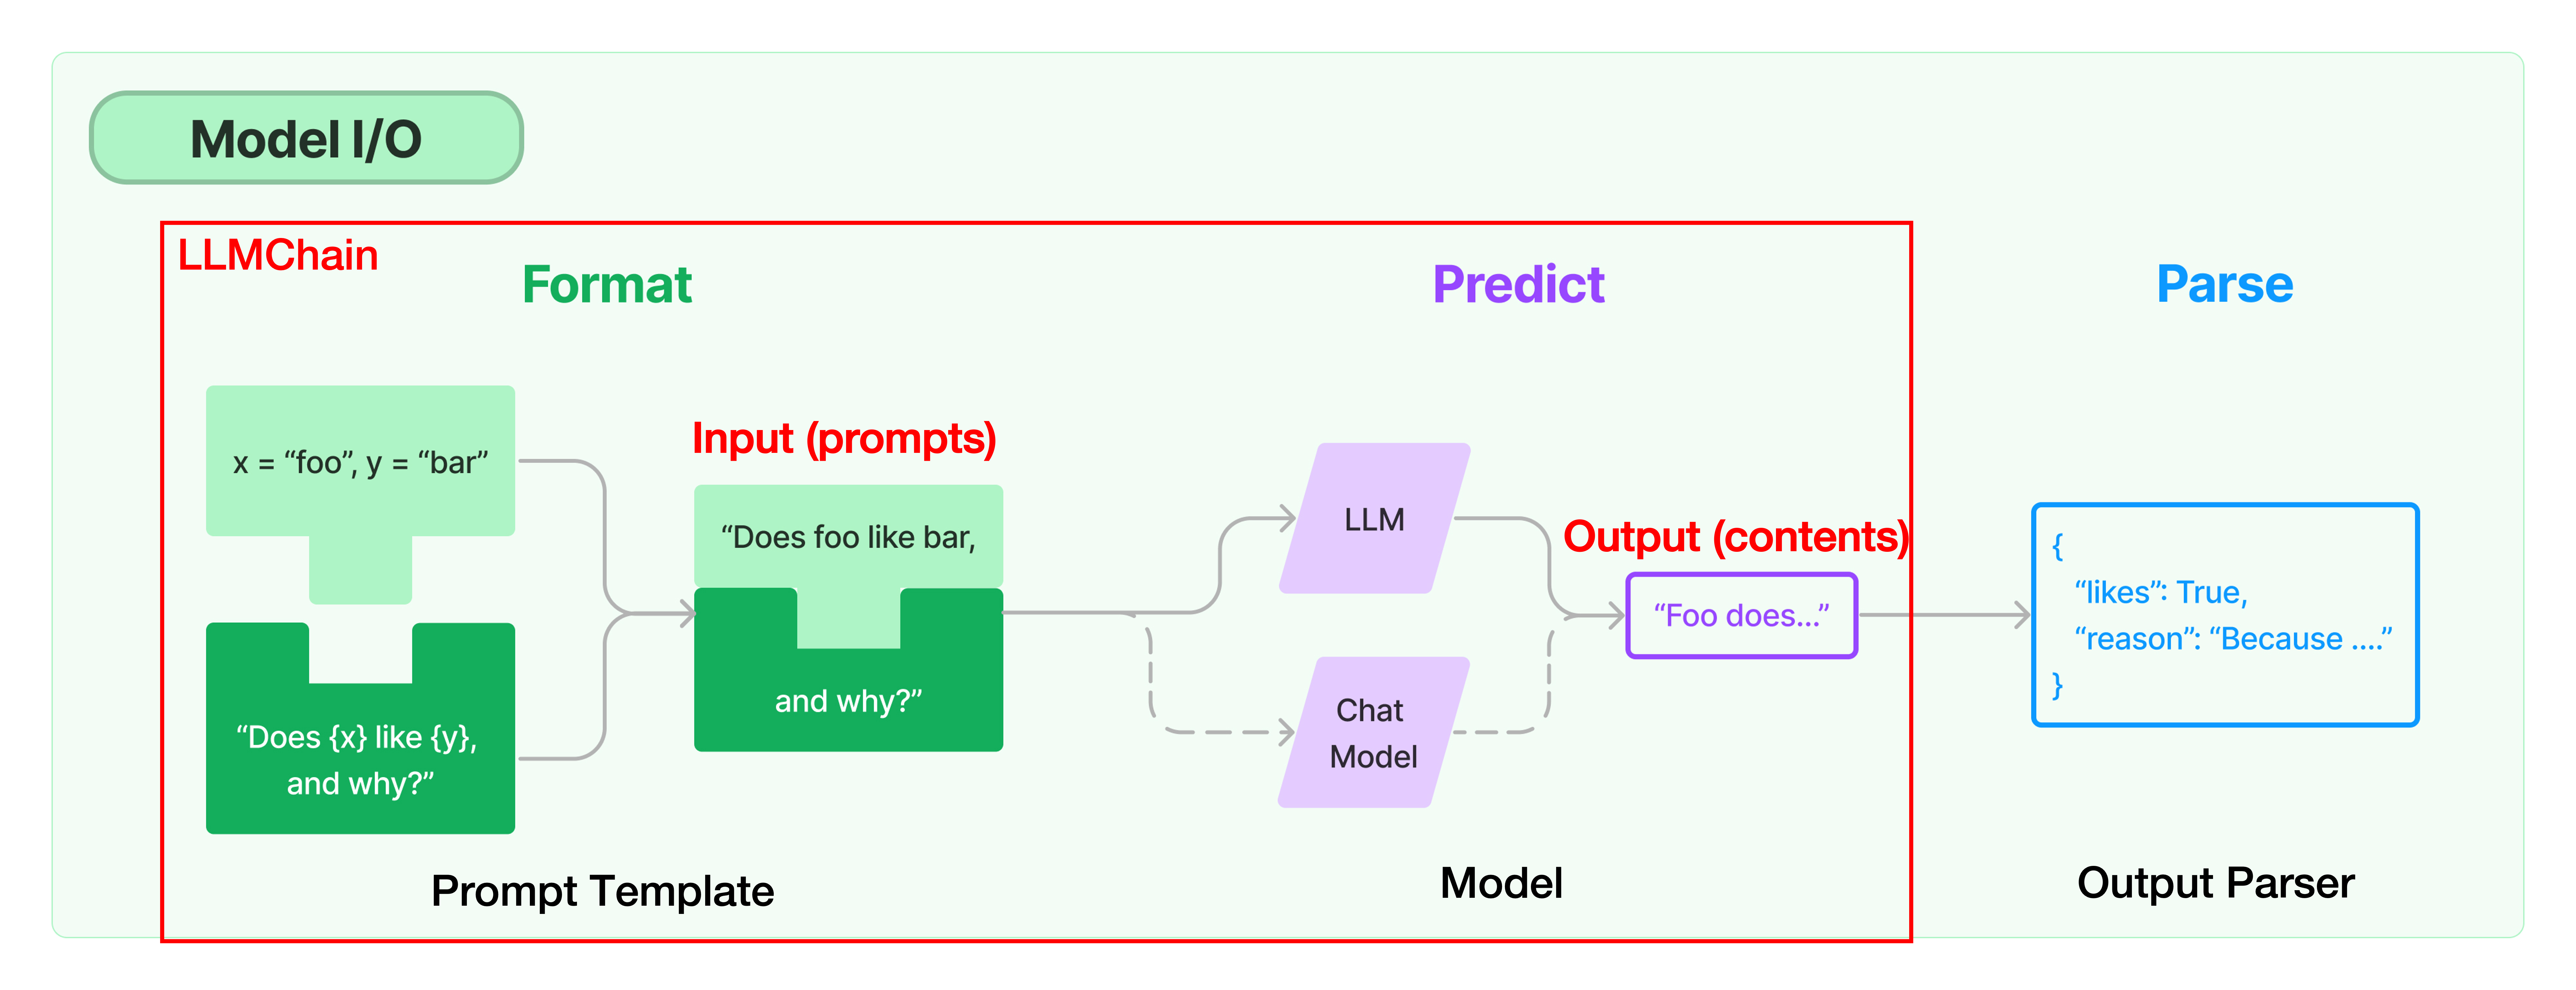

In [2]:
import os
import socket
import socks

socks.set_default_proxy(socks.SOCKS5, "127.0.0.1", 10808)
socket.socket = socks.socksocket

In [3]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

llm = OpenAI(temperature=0.9, max_tokens=500)

prompt = PromptTemplate(
    input_variables=["product"],
    template="给制造{product}的有限公司取10个好名字，并给出完整的公司名称",
)

chain = LLMChain(llm=llm, prompt=prompt)
print(chain.run({
    'product': "性能卓越的GPU"
    }))

d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




1. 炫彩图像有限公司 (Colorful Graphics Inc.)
2. 强力三维科技有限公司 (Powerful 3D Technology Co., Ltd.)
3. 火眼妖光科技有限公司 (Fire-Eye Vision Technology Co., Ltd.)
4. 快速渲染科技有限公司 (Fast Render Technology Co., Ltd.)
5. 星空视界有限公司 (Starview Vision Inc.)
6. 梦幻加速科技有限公司 (Dream Acceleration Technology Co., Ltd.)
7. 超能解析有限公司 (Super Resolution Co., Ltd.)
8. 稳定驱动科技有限公司 (Stable Driver Technology Co., Ltd.)
9. 巨大计算有限公司 (Mega Compute Inc.)
10. 创新绘图科技有限公司 (Innovative Graphics Technology Co., Ltd.)


In [4]:
chain.verbose = True
print(chain.run({
    'product': "性能卓越的GPU"
    }))



> Entering new LLMChain chain...
Prompt after formatting:
给制造性能卓越的GPU的有限公司取10个好名字，并给出完整的公司名称

> Finished chain.


1. 异像科技股份有限公司
2. 卓创电子有限公司
3. 超视辰工程技术有限公司
4. 创芯纬国际有限公司
5. 竞芯科技有限公司
6. 元视界技术有限公司
7. 华韧凌动科技有限公司
8. 高效能科技有限公司
9. 强能创新科技有限公司
10. 钛驰科技有限公司


## 2.Sequential Chain

串联式调用语言模型（将一个调用的输出作为另一个调用的输入）。

顺序链（Sequential Chain ）允许用户连接多个链并将它们组合成执行特定场景的流水线（Pipeline）。有两种类型的顺序链：

SimpleSequentialChain：最简单形式的顺序链，每个步骤都具有单一输入/输出，并且一个步骤的输出是下一个步骤的输入。
SequentialChain：更通用形式的顺序链，允许多个输入/输出。

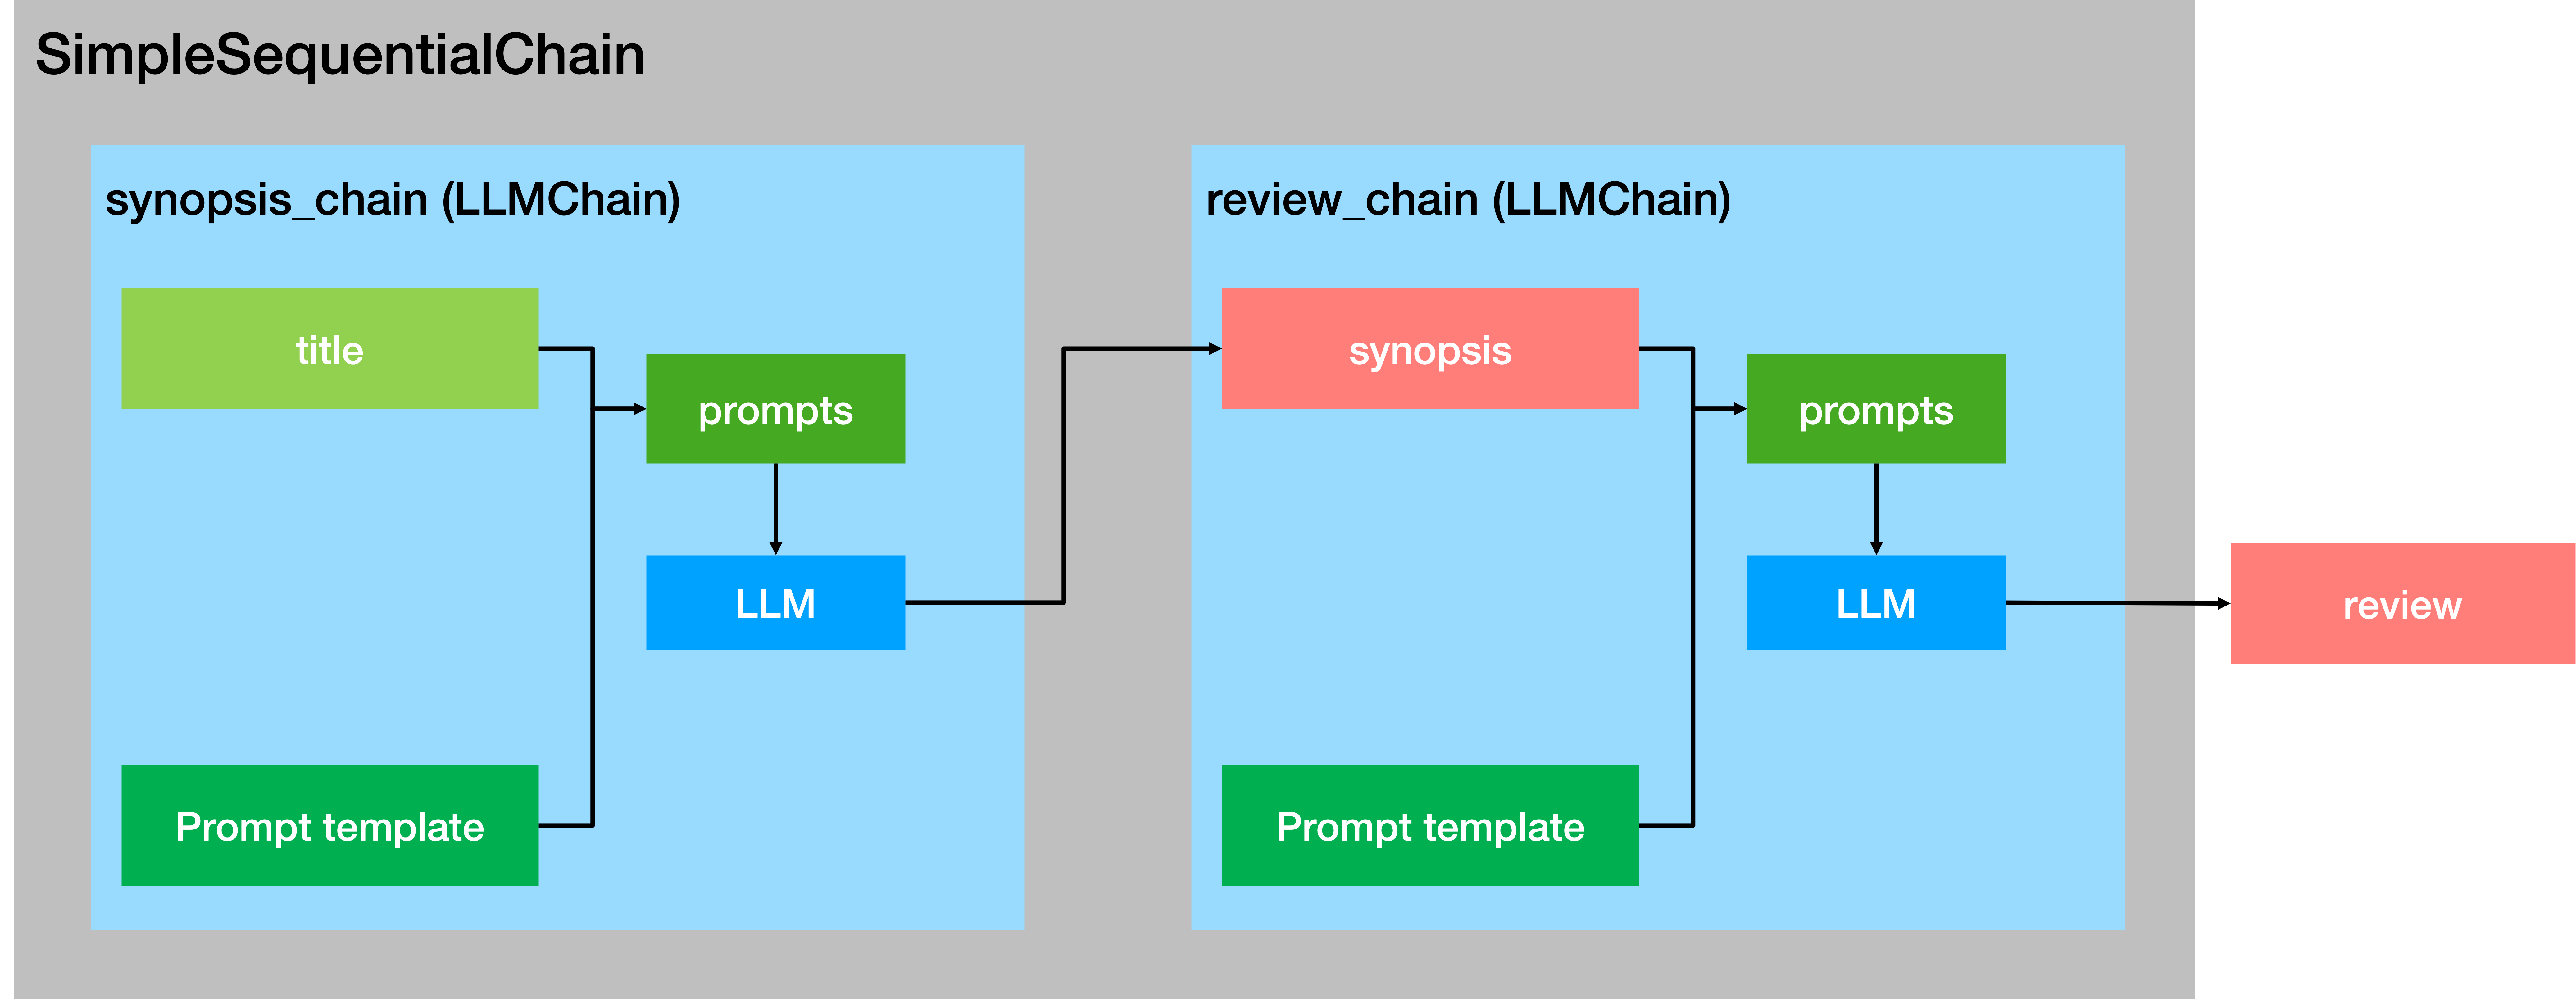


In [5]:

llm = OpenAI(temperature=0.7, max_tokens=1000)

template = """你是一位剧作家。根据戏剧的标题，你的任务是为该标题写一个简介。

标题：{title}
剧作家：以下是对上述戏剧的简介："""

prompt_template = PromptTemplate(input_variables=["title"], template=template)
synopsis_chain = LLMChain(llm=llm, prompt=prompt_template)

In [6]:

# 这是一个LLMChain，用于根据剧情简介撰写一篇戏剧评论。
# llm = OpenAI(temperature=0.7, max_tokens=1000)
template = """你是《纽约时报》的戏剧评论家。根据剧情简介，你的工作是为该剧撰写一篇评论。

剧情简介：
{synopsis}

以下是来自《纽约时报》戏剧评论家对上述剧目的评论："""

prompt_template = PromptTemplate(input_variables=["synopsis"], template=template)
review_chain = LLMChain(llm=llm, prompt=prompt_template)

In [7]:
from langchain.chains import SimpleSequentialChain

overall_chain = SimpleSequentialChain(chains=[synopsis_chain, review_chain], verbose=True)


In [8]:
review = overall_chain.run("乔峰跳崖之后被扫地僧救起，他从此开始了一段新的生活")



> Entering new SimpleSequentialChain chain...


《乔峰跳崖》是一部关于勇气和改变的戏剧。故事开始于武林中最强大的武功高手乔峰跳崖自杀，但幸运的是，他被一位扫地僧救起，从此开始了一段新的生活。乔峰发现自己被救起后，身上的伤势奇迹般地痊愈了，而他也开始重新审视自己的生活和价值观。

在扫地僧的帮助下，乔峰开始了一段新的旅程，远离了武林江湖的纷争和欲望，开始寻找内心的平静和真正的自我。在这段旅程中，乔峰遇到了各种各样的人，也发现了自己内心深处的一些秘密和欲望。最终，乔峰不仅战胜了自己的内心魔鬼，也学会了如何面对过去的错误和挫折，重新开始自己的生活。

这部戏剧将带领观众探索勇气和改变的力量，以及如何通过自我反省和成长来实现内心的平静和真正的幸福。欢迎观众们一同跟随乔峰的旅程，一起探索生命中最珍贵的宝藏。
 

《乔峰跳崖》是一部令人振奋的戏剧，它展现了勇气和改变的力量，同时也探索了生命中最珍贵的宝藏。这部戏剧通过乔峰的旅程，向观众传递了一种积极的生活态度和人生观。

在剧中，乔峰跳崖自杀后被一位扫地僧救起，从此开始了一段新的旅程。通过与各种人物的相遇和经历，乔峰不仅学会了如何面对自己的内心魔鬼，也学会了如何面对过去的错误和挫折，最终实现了内心的平静和真正的幸福。

该剧的表演精彩绝伦，每个演员都将自己的角色诠释得淋漓尽致。尤其是主角乔峰的扮演者，通过精湛的演技，让观众能够深入地感受到他内心的挣扎和成长。

该剧的舞台设计也非常精美，将乔峰的旅程展现得生动而又具有诗意。音乐和灯光的运用也恰到好处，为剧情增添了更多的情感和张力。

总的来说，《乔峰跳崖》是一部不容错过的戏剧作品。它不仅仅是一个故事，更是一种对生活的思考和启示。观众们将在欢笑和泪水中，跟随乔峰一起探索生命中最珍贵的宝藏。强烈推荐给所有戏剧爱好者。

> Finished chain.


## 3.Router Chain

实现条件判断的大模型调用。这段代码构建了一个可定制的链路系统，用户可以提供不同的输入提示，并根据这些提示获取适当的响应。

主要逻辑：从prompt_infos创建多个LLMChain对象，并将它们保存在一个字典中，然后创建一个默认的ConversationChain，最后创建一个带有路由功能的MultiPromptChain。

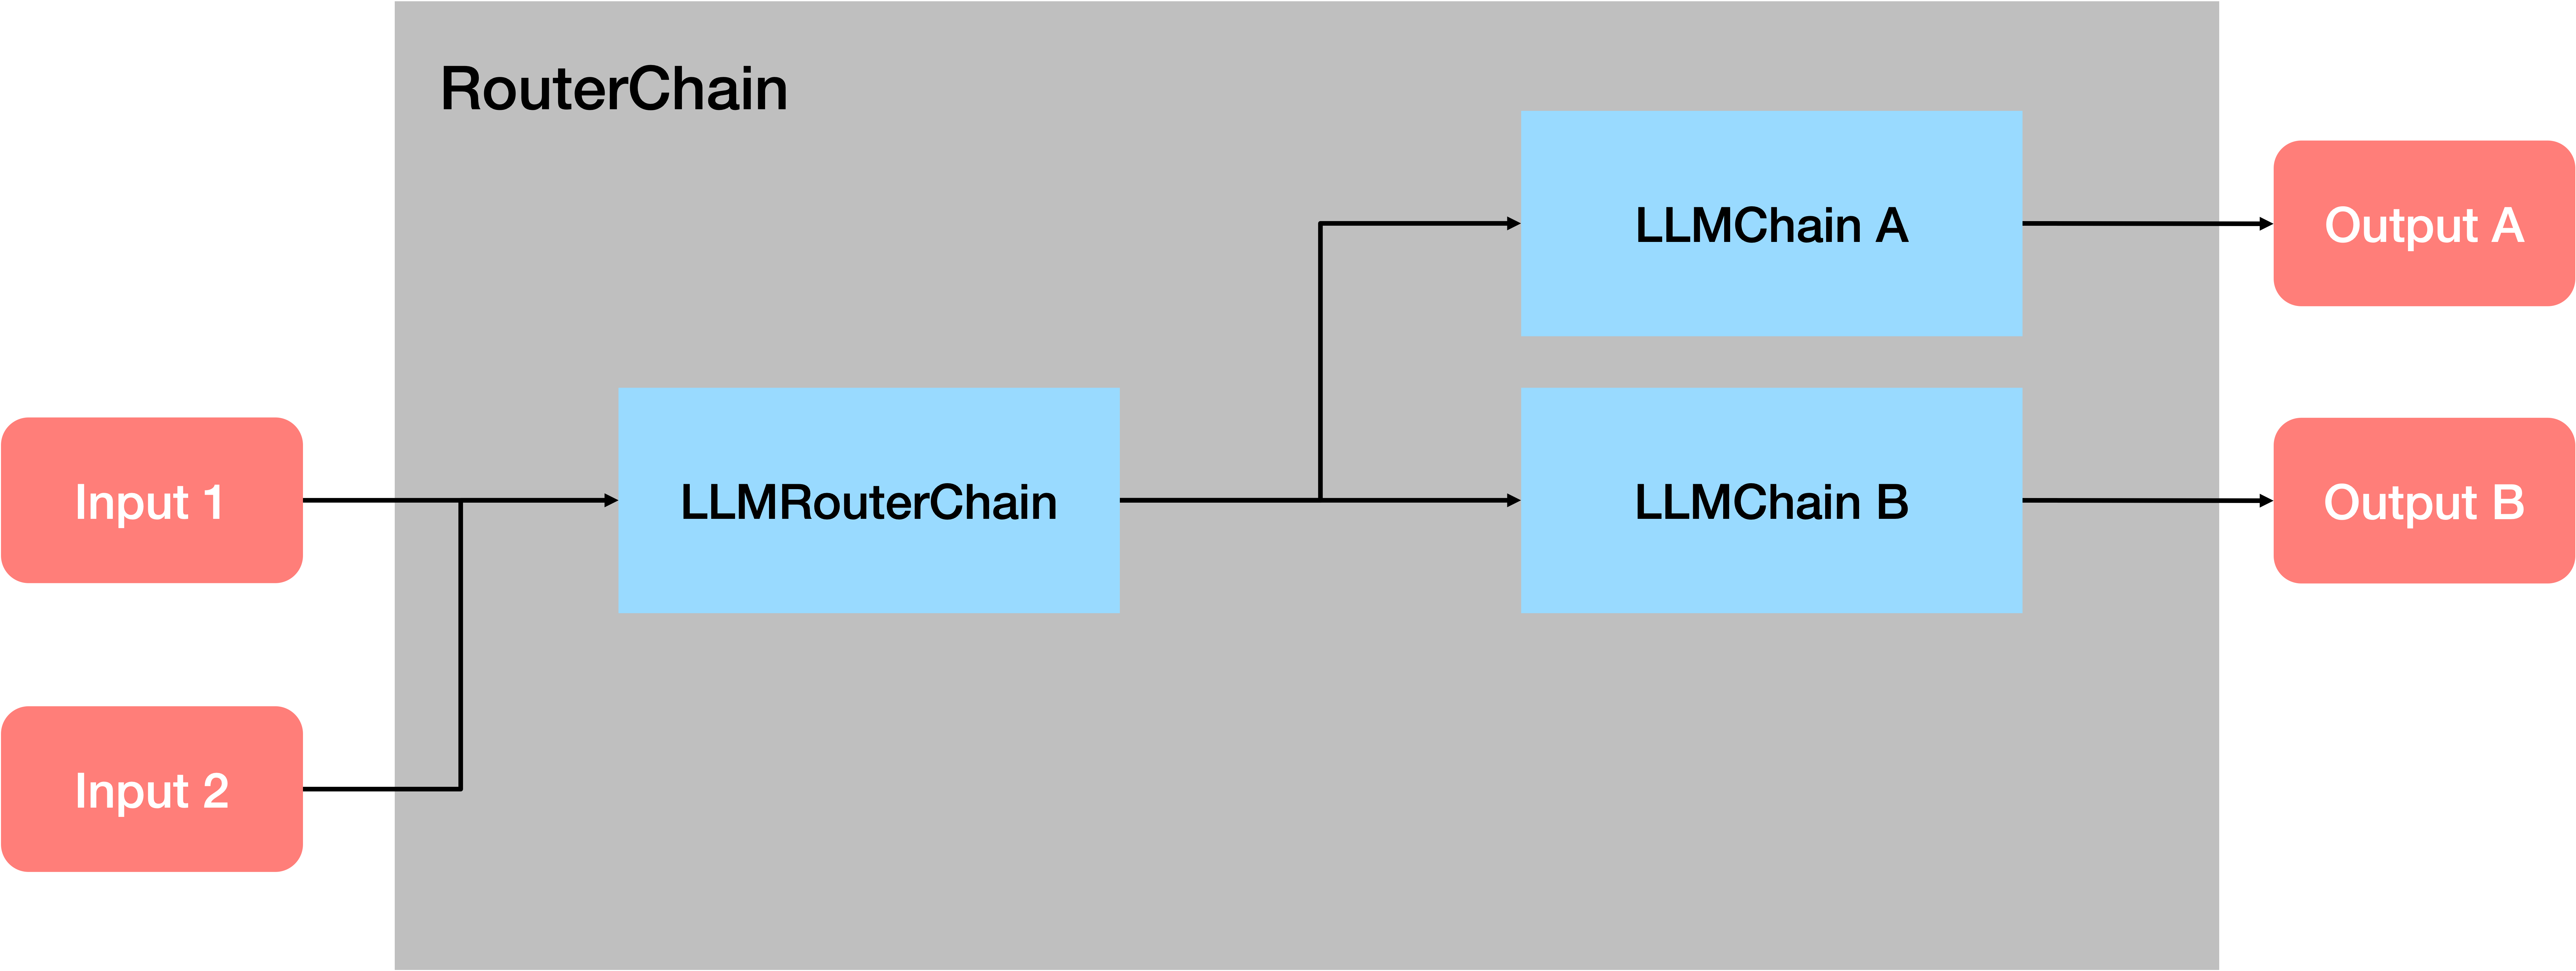

In [9]:
from langchain.chains.router import MultiPromptChain
from langchain.llms import OpenAI
from langchain.chains import ConversationChain
from langchain.chains.llm import LLMChain
from langchain.prompts import PromptTemplate


physics_template = """你是一位非常聪明的物理教授。
你擅长以简洁易懂的方式回答关于物理的问题。
当你不知道某个问题的答案时，你会坦诚承认。

这是一个问题：
{input}"""


math_template = """你是一位很棒的数学家。你擅长回答数学问题。
之所以如此出色，是因为你能够将难题分解成各个组成部分，
先回答这些组成部分，然后再将它们整合起来回答更广泛的问题。

这是一个问题：
{input}"""


prompt_infos = [
    {
        "name": "物理",
        "description": "适用于回答物理问题",
        "prompt_template": physics_template,
    },
    {
        "name": "数学",
        "description": "适用于回答数学问题",
        "prompt_template": math_template,
    },
]

使用 LLMRouterChain 实现条件判断调用
这段代码定义了一个chain对象（LLMRouterChain），该对象首先使用router_chain来决定哪个destination_chain应该被执行，如果没有合适的目标链，则默认使用default_chain。

In [10]:

# 创建一个空的目标链字典，用于存放根据prompt_infos生成的LLMChain。
destination_chains = {}

# 遍历prompt_infos列表，为每个信息创建一个LLMChain。
for p_info in prompt_infos:
    name = p_info["name"]  # 提取名称
    prompt_template = p_info["prompt_template"]  # 提取模板
    # 创建PromptTemplate对象
    prompt = PromptTemplate(template=prompt_template, input_variables=["input"])
    # 使用上述模板和llm对象创建LLMChain对象
    chain = LLMChain(llm=llm, prompt=prompt)
    # 将新创建的chain对象添加到destination_chains字典中
    destination_chains[name] = chain

# 创建一个默认的ConversationChain
default_chain = ConversationChain(llm=llm, output_key="text")

In [11]:
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.chains.router.multi_prompt_prompt import MULTI_PROMPT_ROUTER_TEMPLATE

# 从prompt_infos中提取目标信息并将其转化为字符串列表
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
# 使用join方法将列表转化为字符串，每个元素之间用换行符分隔
destinations_str = "\n".join(destinations)
# 根据MULTI_PROMPT_ROUTER_TEMPLATE格式化字符串和destinations_str创建路由模板
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations=destinations_str)
# 创建路由的PromptTemplate
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)
# 使用上述路由模板和llm对象创建LLMRouterChain对象
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [12]:
print(MULTI_PROMPT_ROUTER_TEMPLATE)

Given a raw text input to a language model select the model prompt best suited for the input. You will be given the names of the available prompts and a description of what the prompt is best suited for. You may also revise the original input if you think that revising it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt names specified below OR it can be "DEFAULT" if the input is not well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (must include ```json at the start of the respon

In [13]:
print(router_template)

Given a raw text input to a language model select the model prompt best suited for the input. You will be given the names of the available prompts and a description of what the prompt is best suited for. You may also revise the original input if you think that revising it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}
```

REMEMBER: "destination" MUST be one of the candidate prompt names specified below OR it can be "DEFAULT" if the input is not well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
物理: 适用于回答物理问题
数学: 适用于回答数学问题

<< INPUT >>
{input}

<< OUTPUT (must include ```json at the start of the

In [14]:

# 创建MultiPromptChain对象，其中包含了路由链，目标链和默认链。
chain = MultiPromptChain(
    router_chain=router_chain,
    destination_chains=destination_chains,
    default_chain=default_chain,
    verbose=True,
)
print(chain.run("黑体辐射是什么？?"))



> Entering new MultiPromptChain chain...
物理: {'input': '黑体辐射是什么？?'}
> Finished chain.

黑体辐射是指具有完美吸收和辐射能力的理想物体所发出的电磁辐射。它的特点是其辐射能量与温度的四次方成正比，即斯特藩-玻尔兹曼定律。这种辐射的波长和强度分布与物体的温度有关，例如太阳的辐射主要集中在可见光和红外波段，而温度较低的物体则主要发出红外和微波波段的辐射。黑体辐射是研究热辐射和量子力学的重要基础，也具有广泛的应用，例如太阳能电池和红外线测温仪。 


In [15]:
print(
    chain.run(
        "大于40的第一个质数是多少，使得这个质数加一能被3整除？"
    )
)



> Entering new MultiPromptChain chain...
数学: {'input': '大于40的第一个质数是多少，使得这个质数加一能被3整除？'}
> Finished chain.


答案：43。因为43是大于40的第一个质数，43+1=44，44能被3整除，所以符合条件。


## 4.Transform Chain

实现快捷处理超长文本
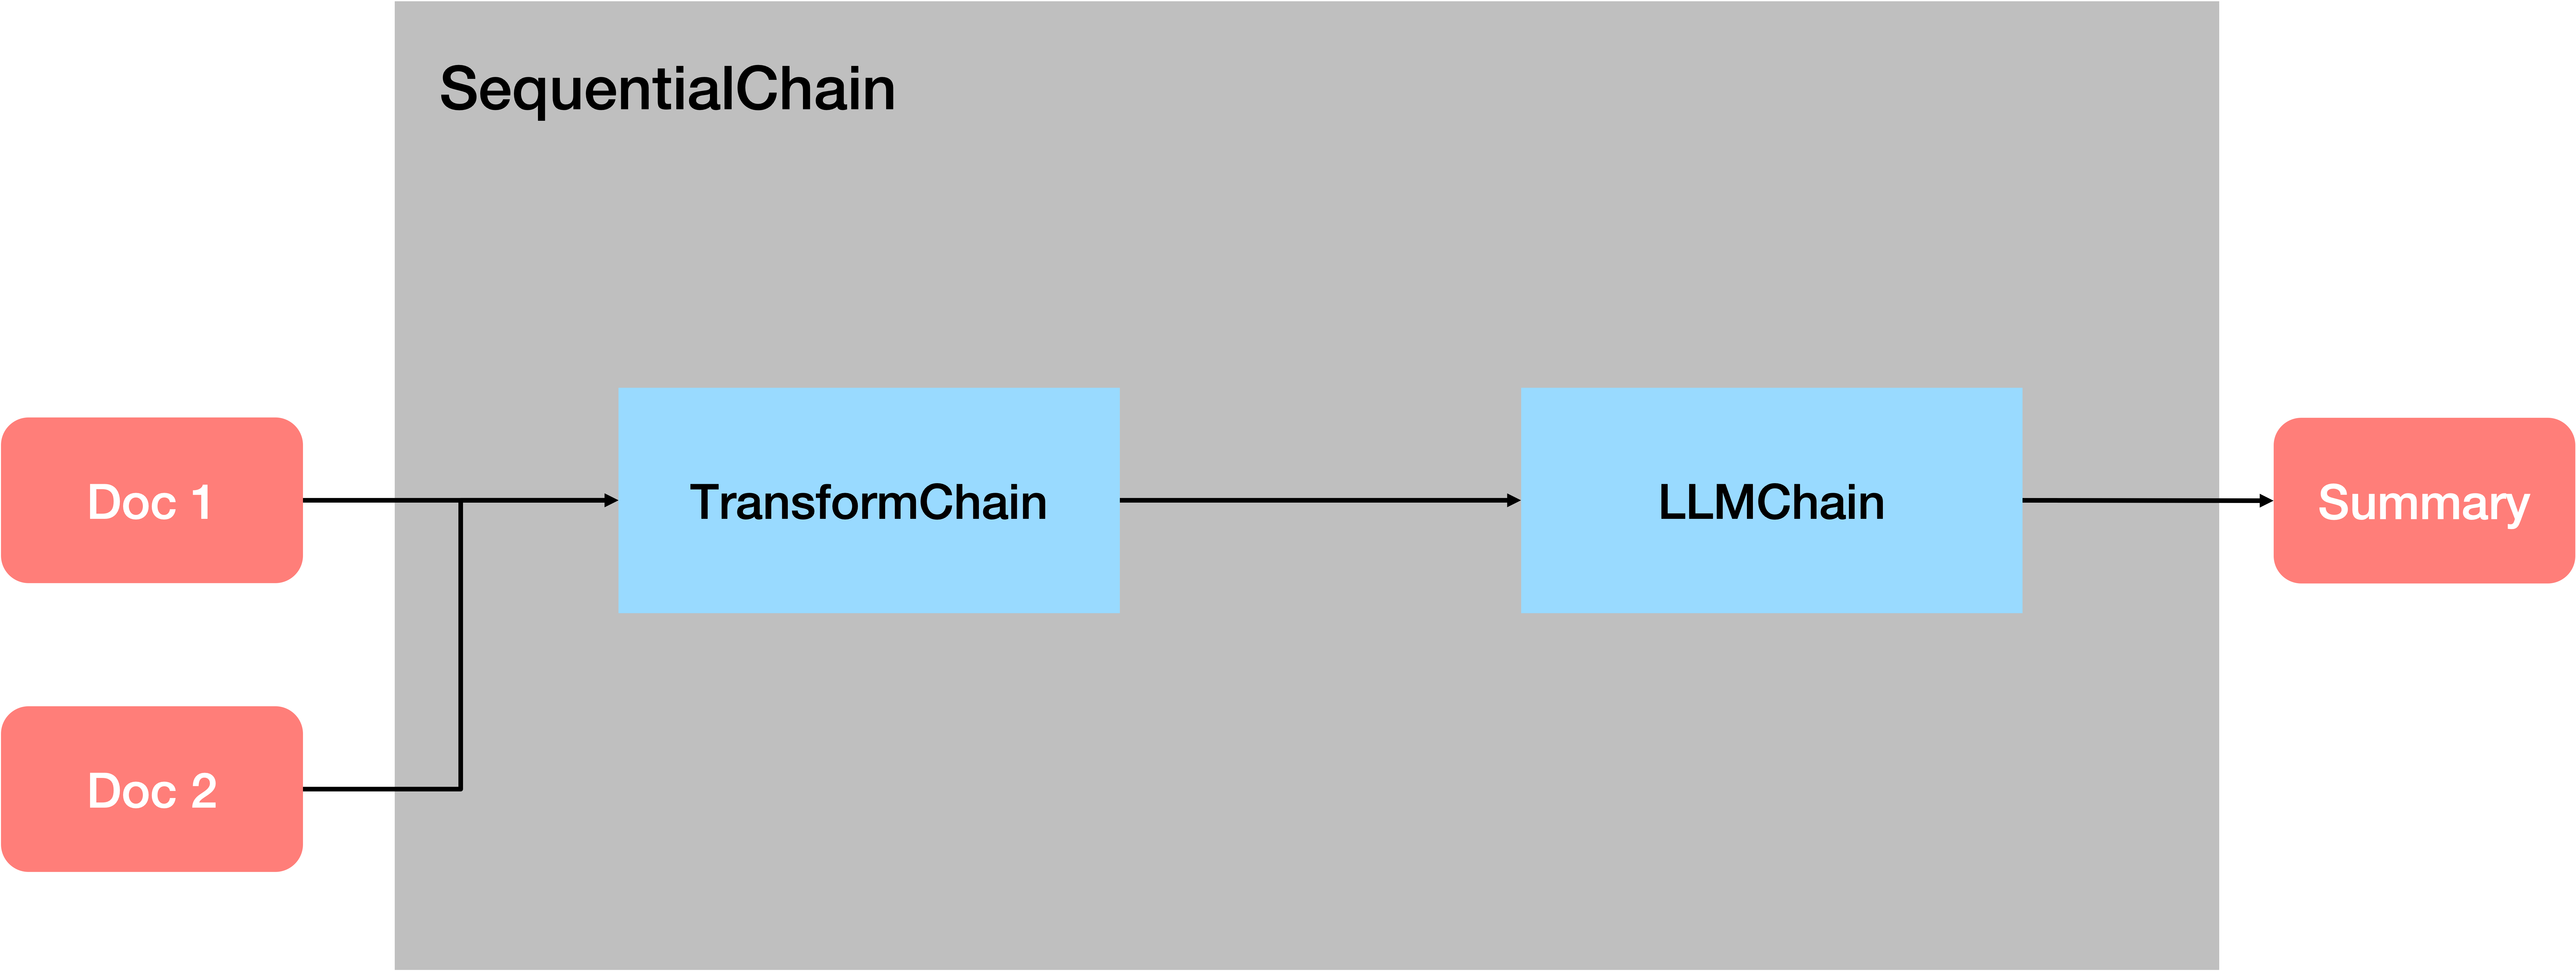

In [16]:
with open("res/the_old_man_and_the_sea.txt") as f:
    novel_text = f.read()

print(novel_text[0:500],type(novel_text))



                 老人与海　
　　　　　　　　        作者：海明威 

　　他是个独自在湾流（注：指墨西哥湾暖流，向东穿过美国佛罗里达州南端和古巴之间的佛罗里达海峡，沿着北美东海岸向东北流动。这股暖流温度比两旁的海水高至度，最宽处达英里，呈深蓝色，非常壮观，为鱼类群集的地方。本书主人公为古巴首都哈瓦那附近小海港的渔夫，经常驶进湾流捕鱼）中一条小船上钓鱼的老人，至今已去了八十四天，一条鱼也没逮住。头四十天里，有个男孩子跟他在一起。可是，过了四十天还没捉到一条鱼，孩子的父母对他说，老人如今准是十足地"倒了血霉"，这就是说，倒霉到了极点，于是孩子听从了他们的吩咐，上了另外一条船，头一个礼拜就捕到了三条好鱼。孩子看见老人每天回来时船总是空的，感到很难受，他总是走下岸去，帮老人拿卷起的钓索，或者鱼钩和鱼叉，还有绕在桅杆上的帆。帆上用面粉袋片打了些补丁，收拢后看来象是一面标志着永远失败的旗子。 
　　老人消瘦而憔悴，脖颈上有些很深的皱纹。腮帮上有些褐斑，那是太阳在热带海面上反射的光线所引起的良性皮肤癌变。褐斑从他脸的两侧一直蔓延下去，他的双手常用绳索拉大鱼，留下了刻得很深 <class 'str'>


In [17]:

from langchain.chains import TransformChain, LLMChain, SimpleSequentialChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate


import os
import socket
import socks

socks.set_default_proxy(socks.SOCKS5, "127.0.0.1", 10808)
socket.socket = socks.socksocket


# 定义一个转换函数，输入是一个字典，输出也是一个字典。
def transform_func(inputs: dict) -> dict:
    # 从输入字典中获取"text"键对应的文本。
    text = inputs["text"]
    # 使用split方法将文本按照"\n\n"分隔为多个段落，并只取前三个，然后再使用"\n\n"将其连接起来。
    shortened_text = "\n\n".join(text.split("\n\n")[:3])
    # 返回裁剪后的文本，用"output_text"作为键。
    return {"output_text": shortened_text}

# 使用上述转换函数创建一个TransformChain对象。
# 定义输入变量为["text"]，输出变量为["output_text"]，并指定转换函数为transform_func。
transform_chain = TransformChain(
    input_variables=["text"], output_variables=["output_text"], transform=transform_func
)

transformed_novel = transform_chain(novel_text)
print(transformed_novel["output_text"])


                 老人与海　
　　　　　　　　        作者：海明威 

　　他是个独自在湾流（注：指墨西哥湾暖流，向东穿过美国佛罗里达州南端和古巴之间的佛罗里达海峡，沿着北美东海岸向东北流动。这股暖流温度比两旁的海水高至度，最宽处达英里，呈深蓝色，非常壮观，为鱼类群集的地方。本书主人公为古巴首都哈瓦那附近小海港的渔夫，经常驶进湾流捕鱼）中一条小船上钓鱼的老人，至今已去了八十四天，一条鱼也没逮住。头四十天里，有个男孩子跟他在一起。可是，过了四十天还没捉到一条鱼，孩子的父母对他说，老人如今准是十足地"倒了血霉"，这就是说，倒霉到了极点，于是孩子听从了他们的吩咐，上了另外一条船，头一个礼拜就捕到了三条好鱼。孩子看见老人每天回来时船总是空的，感到很难受，他总是走下岸去，帮老人拿卷起的钓索，或者鱼钩和鱼叉，还有绕在桅杆上的帆。帆上用面粉袋片打了些补丁，收拢后看来象是一面标志着永远失败的旗子。 
　　老人消瘦而憔悴，脖颈上有些很深的皱纹。腮帮上有些褐斑，那是太阳在热带海面上反射的光线所引起的良性皮肤癌变。褐斑从他脸的两侧一直蔓延下去，他的双手常用绳索拉大鱼，留下了刻得很深的伤疤。但是这些伤疤中没有一块是新的。它们象无鱼可打的沙漠中被侵蚀的地方一般古老。他身上的一切都显得古老，除了那双眼睛，它们象海水一般蓝，是愉快而不肯认输的。
　　“圣地亚哥，"他们俩从小船停泊的地方爬上岸时，孩子对他说。"我又能陪你出海了。我家挣到了一点儿钱。” 
　　老人教会了这孩子捕鱼，孩子爱他。 
　　“不，”老人说。“你遇上了一条交好运的船。跟他们待下去吧。” 
　　“不过你该记得，你有一回八十七天钓不到一条鱼，跟着有三个礼拜，我们每天都逮住了大鱼。” 
　　“我记得，”老人说。“我知道你不是因为没把握才离开我的。” 
　　“是爸爸叫我走的。我是孩子，不能不听从他。” 
　　“我明白，”老人说。“这是理该如此的。” 
　　“他没多大的信心。” 
　　“是啊，”老人说。“可是我们有。可不是吗？” 
　　“对，"孩子说。"我请你到露台饭店去喝杯啤酒，然后一起把打鱼的家什带回去。” 
　　“那敢情好，”老人说。“都是打鱼人嘛。” 
　　他们坐在饭店的露台上，不少渔夫拿老人开玩笑，老人并不生气。另外一些上了些年纪的渔夫望着他，感到难受。不过他们并不流露出来，只是斯文地谈起海流，谈起他

d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


In [18]:
print(type(transformed_novel),transformed_novel["output_text"])


<class 'dict'> 
                 老人与海　
　　　　　　　　        作者：海明威 

　　他是个独自在湾流（注：指墨西哥湾暖流，向东穿过美国佛罗里达州南端和古巴之间的佛罗里达海峡，沿着北美东海岸向东北流动。这股暖流温度比两旁的海水高至度，最宽处达英里，呈深蓝色，非常壮观，为鱼类群集的地方。本书主人公为古巴首都哈瓦那附近小海港的渔夫，经常驶进湾流捕鱼）中一条小船上钓鱼的老人，至今已去了八十四天，一条鱼也没逮住。头四十天里，有个男孩子跟他在一起。可是，过了四十天还没捉到一条鱼，孩子的父母对他说，老人如今准是十足地"倒了血霉"，这就是说，倒霉到了极点，于是孩子听从了他们的吩咐，上了另外一条船，头一个礼拜就捕到了三条好鱼。孩子看见老人每天回来时船总是空的，感到很难受，他总是走下岸去，帮老人拿卷起的钓索，或者鱼钩和鱼叉，还有绕在桅杆上的帆。帆上用面粉袋片打了些补丁，收拢后看来象是一面标志着永远失败的旗子。 
　　老人消瘦而憔悴，脖颈上有些很深的皱纹。腮帮上有些褐斑，那是太阳在热带海面上反射的光线所引起的良性皮肤癌变。褐斑从他脸的两侧一直蔓延下去，他的双手常用绳索拉大鱼，留下了刻得很深的伤疤。但是这些伤疤中没有一块是新的。它们象无鱼可打的沙漠中被侵蚀的地方一般古老。他身上的一切都显得古老，除了那双眼睛，它们象海水一般蓝，是愉快而不肯认输的。
　　“圣地亚哥，"他们俩从小船停泊的地方爬上岸时，孩子对他说。"我又能陪你出海了。我家挣到了一点儿钱。” 
　　老人教会了这孩子捕鱼，孩子爱他。 
　　“不，”老人说。“你遇上了一条交好运的船。跟他们待下去吧。” 
　　“不过你该记得，你有一回八十七天钓不到一条鱼，跟着有三个礼拜，我们每天都逮住了大鱼。” 
　　“我记得，”老人说。“我知道你不是因为没把握才离开我的。” 
　　“是爸爸叫我走的。我是孩子，不能不听从他。” 
　　“我明白，”老人说。“这是理该如此的。” 
　　“他没多大的信心。” 
　　“是啊，”老人说。“可是我们有。可不是吗？” 
　　“对，"孩子说。"我请你到露台饭店去喝杯啤酒，然后一起把打鱼的家什带回去。” 
　　“那敢情好，”老人说。“都是打鱼人嘛。” 
　　他们坐在饭店的露台上，不少渔夫拿老人开玩笑，老人并不生气。另外一些上了些年纪的渔夫望着他，感到难受。不过他们并不流露出

In [19]:

template = """总结下面文本:

{output_text}

总结:"""
prompt = PromptTemplate(input_variables=["output_text"], template=template)
llm_chain = LLMChain(llm=OpenAI(), prompt=prompt, verbose=True)
llm_chain(transformed_novel['output_text'][:1000])




> Entering new LLMChain chain...
Prompt after formatting:
总结下面文本:


                 老人与海　
　　　　　　　　        作者：海明威 

　　他是个独自在湾流（注：指墨西哥湾暖流，向东穿过美国佛罗里达州南端和古巴之间的佛罗里达海峡，沿着北美东海岸向东北流动。这股暖流温度比两旁的海水高至度，最宽处达英里，呈深蓝色，非常壮观，为鱼类群集的地方。本书主人公为古巴首都哈瓦那附近小海港的渔夫，经常驶进湾流捕鱼）中一条小船上钓鱼的老人，至今已去了八十四天，一条鱼也没逮住。头四十天里，有个男孩子跟他在一起。可是，过了四十天还没捉到一条鱼，孩子的父母对他说，老人如今准是十足地"倒了血霉"，这就是说，倒霉到了极点，于是孩子听从了他们的吩咐，上了另外一条船，头一个礼拜就捕到了三条好鱼。孩子看见老人每天回来时船总是空的，感到很难受，他总是走下岸去，帮老人拿卷起的钓索，或者鱼钩和鱼叉，还有绕在桅杆上的帆。帆上用面粉袋片打了些补丁，收拢后看来象是一面标志着永远失败的旗子。 
　　老人消瘦而憔悴，脖颈上有些很深的皱纹。腮帮上有些褐斑，那是太阳在热带海面上反射的光线所引起的良性皮肤癌变。褐斑从他脸的两侧一直蔓延下去，他的双手常用绳索拉大鱼，留下了刻得很深的伤疤。但是这些伤疤中没有一块是新的。它们象无鱼可打的沙漠中被侵蚀的地方一般古老。他身上的一切都显得古老，除了那双眼睛，它们象海水一般蓝，是愉快而不肯认输的。
　　“圣地亚哥，"他们俩从小船停泊的地方爬上岸时，孩子对他说。"我又能陪你出海了。我家挣到了一点儿钱。” 
　　老人教会了这孩子捕鱼，孩子爱他。 
　　“不，”老人说。“你遇上了一条交好运的船。跟他们待下去吧。” 
　　“不过你该记得，你有一回八十七天钓不到一条鱼，跟着有三个礼拜，我们每天都逮住了大鱼。” 
　　“我记得，”老人说。“我知道你不是因为没把握才离开我的。” 
　　“是爸爸叫我走的。我是孩子，不能不听从他。” 
　　“我明白，”老人说。“这是理该如此的。” 
　　“他没多大的信心。” 
　　“是啊，”老人说。“可是我们有。可不是吗？” 
　　“对，"孩子说。"我请你到露台饭店去喝杯啤酒，然后一起把打鱼的家什带回去。” 
　　“那敢情好，”老人说。“都是打鱼人嘛。” 
　　他们坐在饭

{'output_text': '\n                 老人与海\u3000\n\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000        作者：海明威 \n\n\u3000\u3000他是个独自在湾流（注：指墨西哥湾暖流，向东穿过美国佛罗里达州南端和古巴之间的佛罗里达海峡，沿着北美东海岸向东北流动。这股暖流温度比两旁的海水高至度，最宽处达英里，呈深蓝色，非常壮观，为鱼类群集的地方。本书主人公为古巴首都哈瓦那附近小海港的渔夫，经常驶进湾流捕鱼）中一条小船上钓鱼的老人，至今已去了八十四天，一条鱼也没逮住。头四十天里，有个男孩子跟他在一起。可是，过了四十天还没捉到一条鱼，孩子的父母对他说，老人如今准是十足地"倒了血霉"，这就是说，倒霉到了极点，于是孩子听从了他们的吩咐，上了另外一条船，头一个礼拜就捕到了三条好鱼。孩子看见老人每天回来时船总是空的，感到很难受，他总是走下岸去，帮老人拿卷起的钓索，或者鱼钩和鱼叉，还有绕在桅杆上的帆。帆上用面粉袋片打了些补丁，收拢后看来象是一面标志着永远失败的旗子。 \n\u3000\u3000老人消瘦而憔悴，脖颈上有些很深的皱纹。腮帮上有些褐斑，那是太阳在热带海面上反射的光线所引起的良性皮肤癌变。褐斑从他脸的两侧一直蔓延下去，他的双手常用绳索拉大鱼，留下了刻得很深的伤疤。但是这些伤疤中没有一块是新的。它们象无鱼可打的沙漠中被侵蚀的地方一般古老。他身上的一切都显得古老，除了那双眼睛，它们象海水一般蓝，是愉快而不肯认输的。\n\u3000\u3000“圣地亚哥，"他们俩从小船停泊的地方爬上岸时，孩子对他说。"我又能陪你出海了。我家挣到了一点儿钱。” \n\u3000\u3000老人教会了这孩子捕鱼，孩子爱他。 \n\u3000\u3000“不，”老人说。“你遇上了一条交好运的船。跟他们待下去吧。” \n\u3000\u3000“不过你该记得，你有一回八十七天钓不到一条鱼，跟着有三个礼拜，我们每天都逮住了大鱼。” \n\u3000\u3000“我记得，”老人说。“我知道你不是因为没把握才离开我的。” \n\u3000\u3000“是爸爸叫我走的。我是孩子，不能不听从他。” \n\u3000\u3000“我明白，”老人说。“这是理该如此的。” \n\u3000\u3000“他没多大

In [22]:
sequential_chain = SimpleSequentialChain(chains=[transform_chain, llm_chain])
sequential_chain.run(novel_text[10000:12000])



> Entering new LLMChain chain...
Prompt after formatting:
总结下面文本:

总是把它们精确地放在适当的地方的。问题只在于我的运气就此不好了。可是谁说得准呢？说不定今天就转运。每一天都是一个新的日子。走运当然是好。不过我情愿做到分毫不差。这样，运气来的时候，你就有所准备了。 
　　两小时过去了，太阳如今相应地升得更高了，他朝东望时不再感到那么刺眼了。眼前只看得见三条船，它们显得特别低矮，远在近岸的海面上。 
　　我这一辈子，初升的太阳老是刺痛我的眼睛，他想。然而眼睛还是好好的。傍晚时分，我可以直望着太阳，不会有眼前发黑的感觉。阳光的力量在傍晚也要强一些。不过在早上它叫人感到眼痛。 
　　就在这时，他看见一只长翅膀的黑色军舰鸟在他前方的天空中盘旋飞翔。它倏地斜着后掠的双翅俯冲，然后又盘旋起来。 
　　“它逮住了什么东西啦，"老人说出声来。"它不光是找找罢了。” 
　　他慢慢划着，直朝鸟儿盘旋的地方划去。他并不匆忙，让那些钓索保持着上下笔直的位置。不过他还是挨近了一点儿海流，这样，他依然在用正确的方式捕鱼，尽管他的速度要比他不打算利用鸟儿来指路时来得快。 
　　军舰鸟在空中飞得高些了，又盘旋起来，双翅纹丝不动。它随即猛然俯冲下来，老人看见飞鱼从海里跃出，在海面上拚命地掠去。 
　　“鲯鳅，"老人说出声来。"大鲯鳅。” 
　　他把双桨从桨架上取下，从船头下面拿出一根细钓丝。钓丝上系着一段铁丝导线和一只中号钓钩，他拿一条沙丁鱼挂在上面。他把钓丝从船舷放下水去，将上端紧系在船梢一只拳头螺栓上。跟着他在另一根钓丝上安上了鱼饵，把它盘绕着搁在船头的阴影里。他又划起船来，注视着那只此刻正在水面上低低地飞掠的长翅膀黑鸟。 
　　他看着看着，那鸟儿又朝下冲，为了俯冲，把翅膀朝后掠，然后猛地展开，追踪着飞鱼，可是没有成效。老人看见那些大鲯鳅跟在那脱逃的鱼后面，把海面弄得微微隆起。鲯鳅在飞掠的鱼下面破水而行，只等飞鱼一掉下，就飞快地钻进水里。这群鲯鳅真大啊，他想。它们分布得很广，飞鱼很少脱逃的机会。那只鸟可没有成功的机会。飞鱼对它来说个头太大了，而且又飞得太快。 
　　他看着飞鱼一再地从海里冒出来，看着那只鸟儿的一无效果的行动。那群鱼从我附近逃走啦，他想。它们逃得太快，游得太远啦。不过说不定我能逮住一条掉队的，说不定我想望的大鱼就

' 本文主要讲述了老人在海上捕鱼的故事。老人总是将钓索放置在合适的位置，准备好迎接运气的到来。老人看到一只军舰鸟捕捉飞鱼，便尝试用钓鱼来捕捉。同时，作者还介绍了一些关于海面上的生物，如军舰鸟、海龟和海水母。老人对海龟的捕杀持有同情态度，认为它们也有生命和心脏。整篇文章通过描写老人的一天，展现了他对大海的熟悉和对生活的乐观态度。'

## 5.Conversational Chain

实现对话式大模型调用